<a href="https://colab.research.google.com/github/Anastasia-Lyashuk/Auto_KZ_2019/blob/main/Auto_kz_2019_gh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Загрузка данных и подготовка их к анализу


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.1. Импорт библиотек pandas, numpy, datetime, matplotlib.pyplot, seaborn

In [3]:
import pandas as pd
from numpy import median
import numpy as np
from datetime import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
import math as mth
from plotly import graph_objects as go
import plotly.express as px
import re
from scipy import stats as st
pd.set_option('display.max_columns', None) #настройка, чтобы pandas не урезал столбцы
#pd.set_option('display.max_rows', None)

## 1.2. Загрузка данных из CSV-файла в переменную data


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Projects_AD/Masterskaya_1_авторынок Казахстана 2019/auto_kz_2019.csv', sep=';', decimal=',')

## 1.3. Изучим данные в датасете

In [5]:
display(data.head(5))
data.info();

Год   Месяц     Компания Бренд Модель Модификация Год выпуска  \
0  2019     Май  Mercur Auto  Audi     A3        TFSI        2018   
1  2019  Август  Mercur Auto  Audi     A3        TFSI        2018   
2  2019  Апрель  Mercur Auto  Audi     A4        TFSI        2018   
3  2019    Июль  Mercur Auto  Audi     A4        TFSI        2018   
4  2019    Июль  Mercur Auto  Audi     A4        TFSI        2018   

  Страна-производитель Вид топлива Объём двиг, л, Коробка передач Тип привода  \
0             Германия      Бензин            1,4        S-tronic    передний   
1             Германия      Бензин            1,4        S-tronic    передний   
2             Германия      Бензин            1,4        S-Tronic         FWD   
3             Германия      Бензин            1,4        S-tronic    передний   
4             Германия      Бензин            1,4        S-tronic    передний   

                       Сегмент  Регион Наименование дилерского центра  \
0  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   
1  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   
2  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   
3  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   
4  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   

  Тип клиента Форма расчета  Количество  Цена, USD  Продажа, USD   Область  \
0   Физ. Лицо   безналичный         1.0   28115.00      28115.00  г.Алматы   
1    Юр. Лицо      наличный         1.0   32246.99      32246.99  г.Алматы   
2   Физ. Лицо   безналичный         1.0   32000.00      32000.00  г.Алматы   
3    Юр. Лицо   безналичный         1.0   31929.00      31929.00  г.Алматы   
4   Физ. Лицо      наличный         1.0   31929.00      31929.00  г.Алматы   

      Сегментация 2013 Класс 2013 Сегментация Eng Локализация производства  
0  Легковые автомобили    C класс               C                   Импорт  
1  Легковые автомобили    C класс               C                   Импорт  
2  Легковые автомобили    D класс               D                   Импорт  
3  Легковые автомобили    D класс               D                   Импорт  
4  Легковые автомобили    D класс               D                   Импорт

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             39966 non-null  int64  
 1   Месяц                           39966 non-null  object 
 2   Компания                        39966 non-null  object 
 3   Бренд                           39966 non-null  object 
 4   Модель                          39966 non-null  object 
 5   Модификация                     36375 non-null  object 
 6   Год выпуска                     39465 non-null  object 
 7   Страна-производитель            39966 non-null  object 
 8   Вид топлива                     36826 non-null  object 
 9   Объём двиг, л,                  35708 non-null  object 
 10  Коробка передач                 36711 non-null  object 
 11  Тип привода                     35677 non-null  object 
 12  Сегмент                         

## 1.4. Удалим столбцы "Модификация", "Сегмент", "Наименование диллерского центра", "Тип клиента", "Форма расчета", "Область", "Класс Eng", "Локализация производства" по индексу, согласно техническому заданию

In [6]:
data.drop(data.columns[[5, 12, 14, 15, 16, 20, 23, 24]], axis= 1 , inplace= True )

## 1.5. Переименуем оставшиеся столбцы

In [7]:
# делаем список колонок датасета
old_cols = data.columns.tolist()

In [8]:
# делаем список из новых колонок
new_cols = ['year', 'month', 'company', 'brand', 'model', 'year_issue', 'country', 'fuel_type', 'engine_capacity', 'transmission',
            'drive_type', 'region', 'quantity', 'price', 'sale', 'segmentation_2013', 'class_2013']

In [9]:
# создаем словарь через выражение
cols_change_dict = {k: v for k, v in zip(old_cols, new_cols)}

In [10]:
# меняем значения по словарю
data.columns = data.columns.map(cols_change_dict)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               39966 non-null  int64  
 1   month              39966 non-null  object 
 2   company            39966 non-null  object 
 3   brand              39966 non-null  object 
 4   model              39966 non-null  object 
 5   year_issue         39465 non-null  object 
 6   country            39966 non-null  object 
 7   fuel_type          36826 non-null  object 
 8   engine_capacity    35708 non-null  object 
 9   transmission       36711 non-null  object 
 10  drive_type         35677 non-null  object 
 11  region             39966 non-null  object 
 12  quantity           39960 non-null  float64
 13  price              39966 non-null  float64
 14  sale               39966 non-null  float64
 15  segmentation_2013  39966 non-null  object 
 16  class_2013         399

## 1.6. Создадим дополнительный столбец date - объединим столбцы year и month

In [12]:
# выведем месяцы, которые используются в датасете
data['month'].unique()

array(['Май', 'Август', 'Апрель', 'Июль', 'Февраль', 'Июнь', 'Сентябрь',
       'Январь', 'Март'], dtype=object)

In [13]:
# делаем список из 9 месяцев
months_list = ['Январь','Февраль', 'Март', 'Апрель', 'Май','Июнь','Июль', 'Август','Сентябрь']

In [14]:
# создаем список из новых месяцев из значений от 1 до 9
new_months_list = list(range(1, 10))

In [15]:
# создадим словарь через выражение
months_change_dict_1 = {k: v for k, v in zip(months_list, new_months_list)}

In [16]:
# меняем значения по словарю
data.month = data.month.map(months_change_dict_1)

In [17]:
# объединим столбцы year и month в столбец date (дата)
data['date'] = pd.to_datetime(data[['year', 'month']].assign(day=1))

In [18]:
# удалим столбцы year и month, далее будем использовать столбец date
data.drop(data.columns[[0, 1]], axis= 1 , inplace= True )

In [19]:
#удалим лишние пробелы year_issure
data['year_issue'].replace(regex=True,inplace=True,to_replace=r'\s{1,}',value=r'')
print(data['year_issue'].value_counts())

2019    30026
2018     9081
2017      324
2016       30
2014        2
2013        1
2011        1
Name: year_issue, dtype: int64


Согласно данным в столбце year_issue (год выпуска), мы видим, что основная масса машин (около 75%) новые, т.е. им не больше года. Таким образом, делаем вывод, что продаются в основном новые машины. Столбец с датой выпуска можно удалить

In [20]:
# удаляем столбец year_issue
data.drop('year_issue', axis= 1 , inplace= True )

## 1.7. Поиск дубликатов

In [21]:
# создадим переменную с размером датасета до преобразований

data_first = data.shape[0]
data_first

39966

### 1.7.1. Поиск явных дубликатов

In [22]:
print(data.duplicated().sum()) #ищем явные дубликаты

24184


In [23]:
share_dup = data.duplicated().sum()/data_first
print(f'Дублиакаты от общего размера датасета составляют {share_dup:.2%}')

Дублиакаты от общего размера датасета составляют 60.51%


Дубликатов почти 60% от исходного датафрема, это очень много, поэтому принимаем решение изучить данные более подробно прежде чем их удалять.

### 1.7.2. Поиск неявных дубликатов в столбце company

In [24]:
data['company'] = data['company'].str.lower() #приведем все буквы к нижнему регистру

In [25]:
print(data['company'].unique()) #найдем уникальные названия компаний

['mercur auto' 'автоцентр-бавария' 'бипэк авто' 'вираж'
 'eurasia motor premium' 'daewoo bus kazakhstan' 'caspian motors'
 'каспиан моторс' 'семаз' 'astana motors' 'astana motors '
 'hyundai com trans kazakhstan ' 'nissan manufacturing rus' 'свс-транс'
 'allur auto' 'almaty motors premium' 'terra motors' 'тк камаз'
 'toyota motor kazakhstan' 'лифан моторс рус' 'man truck & bus kazakhstan'
 'автомир гк' 'autokapital' 'автокапитал' 'ммс рус' 'mmc rus'
 'mercur autos' 'узавто-казахстан' 'равон моторс казахстан'
 'ravon motors kazakstan' 'renault россия' 'scania central asia'
 'subaru kazakhstan' 'volkswagen group rus' 'автодом motors kst'
 'автомир-центр' 'тоо "eurasia motor zhaik"' 'scandinavian motors'
 'хино моторс казахстан' 'hino motors ']


In [26]:
#удалим из названия лишние пробелы
data['company'].replace(regex=True,inplace=True,to_replace=r'\s{2,}',value=r'')

In [27]:
#уберем неявные дубликаты
data = data.apply(lambda x:x.replace(
    {'mercur autos':'mercur auto','каспиан моторс':'caspian motors', 'ммс рус':'mmc rus','автокапитал':'autokapital',
     'равон моторс казахстан':'ravon motors kazakstan', 'astana motors ':'astana motors',
     'хино моторс казахстан':'hino motors ','тоо "eurasia motor zhaik"':'тоо eurasia motor zhaik'}, regex=True))

In [28]:
#поверка столбца company
print(data['company'].unique())

['mercur auto' 'автоцентр-бавария' 'бипэк авто' 'вираж'
 'eurasia motor premium' 'daewoo bus kazakhstan' 'caspian motors' 'семаз'
 'astana motors' 'hyundai com trans kazakhstan '
 'nissan manufacturing rus' 'свс-транс' 'allur auto'
 'almaty motors premium' 'terra motors' 'тк камаз'
 'toyota motor kazakhstan' 'лифан моторс рус' 'man truck & bus kazakhstan'
 'автомир гк' 'autokapital' 'mmc rus' 'узавто-казахстан'
 'ravon motors kazakstan' 'renault россия' 'scania central asia'
 'subaru kazakhstan' 'volkswagen group rus' 'автодом motors kst'
 'автомир-центр' 'тоо eurasia motor zhaik' 'scandinavian motors'
 'hino motors ']


### 1.7.3. Поиск неявных дубликатов в столбце brand

In [29]:
print(data['brand'].unique()) #найдем уникальные названия брендов

['Audi' 'BMW' 'Chevrolet' 'Daewoo' 'Ford' 'Foton' 'GAZ' 'Hyundai'
 'Hyundai Truck & Bus' 'Infiniti' 'Isuzu' 'Iveco' 'Jac' 'Jaguar' 'KAMAZ'
 'Kia' 'Lada' 'Land Rover' 'Lexus' 'Lifan' 'MAN' 'Mazda' 'Mercedes-Benz'
 'Mercedes-Benz Trucks' 'Mini' 'Mitsubishi' 'Nissan' 'Peugeot' 'Porsche'
 'Ravon' 'Renault' 'Scania' 'Skoda' 'Subaru' 'Toyota' 'UAZ' 'Volkswagen'
 'Volvo' 'Урал' 'Cadillac' 'Shacman' 'Hino' 'Dong Feng' 'ANKAI' 'Nefaz'
 'Yutong']


Неявные дубликаты не найдены. Оставляем данные в столбце без изменений.

### 1.7.4. Поиск неявных дубликатов в столбце model

In [30]:
#найдем уникальные названия моделей
print(data['model'].unique())

['A3' 'A4' 'A6' 'A7' 'A8' 'Q5' 'Q7' '3 серия' '5 серия' '6 серия'
 '7 серия' 'X1' 'X3' 'X4' 'X5' 'X6' 'X7' 'Z4' 'Aveo' 'Captiva' 'Niva'
 'Tahoe' 'Tracker' 'BS 106 A' 'Fiesta' 'Mondeo' 'BJ3253DMPKB-AD' '2217'
 '2310' '2705' '2752' '3221' '3302' '3308' '3309' 'Next' 'Accent' 'Creta'
 'Elantra' 'Santa Fe' 'Sonata' 'TQ-1/H-1' 'County' 'H350' 'HD 160'
 'HD 170' 'HD 65' 'HD 78' 'Universe' 'Tucson' 'Q50' 'QX50' 'QX60' 'QX80'
 'D-MAX' 'NMR' 'NPR' 'Daily' 'Daily A' 'Daily V' 'Stralis' 'Tipper' 'S3'
 'S5' 'F-Pace' 'F-Type' 'XE' 'XF' 'XJ' '4308' '4311' '43118' '43253'
 '43502' '44108' '45142' '45143' '53215' '53504' '53605' '54115' '5490'
 '65111' '65115' '65116' '65117' '6520' '65206' '65225' '66052' '6606'
 'Cerato' 'Optima' 'Picanto' 'Quoris' 'Rio' 'Sorento' 'Soul' 'Sportage'
 '4x4' 'Granta' 'Kalina' 'Largus' 'Vesta' 'XRAY' 'ВИС' 'Discovery'
 'Discovery Sport' 'Range Rover' 'Range Rover Evoque' 'Range Rover Sport'
 'ES' 'GX' 'LS' 'LX' 'NX' 'RX' 'RXH' 'Murman' 'Solano' 'X50' 'X60' 'TG'
 '3' '6'

Неявняе дубликаты не обнаружены, оставляем данные в столбце без изменений.

## 1.8. Кодируем страны производители

In [31]:
# найдем уникальные названия стран
print(data['country'].unique())

['Германия' 'США' 'Австрия' 'Республика Казахстан' 'Российская Федерация'
 'Корея' 'Япония' 'Таиланд' 'Китай' 'UK' 'Узбекистан' 'Венгрия' 'Турция'
 'Испания' 'Нидерланды' 'Польша' 'Швеция' 'Белоруссия' 'Бельгия']


In [32]:
#загрузим коды стран alpha3 с сайта
type(pd.read_html('https://www.artlebedev.ru/country-list/', encoding='utf8'))

list

In [33]:
# Делаем датасет с кодами стран путем загрузки данных с сайта Лебедева,
# переименуем столбцы на английский язык для удобства работы
countries_codes = (pd.read_html('https://www.artlebedev.ru/country-list/', encoding='utf8')[0]
 [['Наименование', 'Полное наименование', 'Alpha3']].\
                   rename(columns={'Наименование':'name', 'Полное наименование':'full_name'}))

In [34]:
# Создаем словарь для замены названий стран на коды Alpha3. Ключи - названия стран, значения - коды.
countries_codes_dict = {}
for i in range(len(countries_codes)):
  if countries_codes.loc[i]['name'] not in countries_codes_dict:
    countries_codes_dict[countries_codes.loc[i]['name']] = countries_codes.loc[i]['Alpha3']
    if countries_codes.loc[i]['full_name'] not in countries_codes_dict:
      countries_codes_dict[countries_codes.loc[i]['full_name']] = countries_codes.loc[i]['Alpha3']

In [35]:
# Создаем словарь для замены названий стран на коды Alpha3. Ключи - названия стран,значения - коды.
data.country = data.country.apply(lambda cell: countries_codes_dict.get(cell, cell))

In [36]:
# Смотрим на корректность замены - три страны не изменились: США, Корея и Белоруссия.
data.country.unique()

array(['DEU', 'США', 'AUT', 'KAZ', 'RUS', 'Корея', 'JPN', 'THA', 'CHN',
       'UK', 'UZB', 'HUN', 'TUR', 'ESP', 'NLD', 'POL', 'SWE',
       'Белоруссия', 'BEL'], dtype=object)

In [37]:
# Меняем ключи в словаре
codes_dict_new = countries_codes_dict
codes_dict_new['Белоруссия'] = codes_dict_new.pop('Беларусь')
codes_dict_new['США'] = codes_dict_new.pop('Соединенные Штаты')
codes_dict_new['Корея'] = codes_dict_new.pop('Корея, Республика')

In [38]:
# Проверяем корректность работы кода (отображение кода страны)
codes_dict_new['Корея']

'KOR'

In [39]:
# применяем код к столбцу country
data.country = data.country.apply(lambda cell: codes_dict_new.get(cell,cell))
data.country.unique()

array(['DEU', 'USA', 'AUT', 'KAZ', 'RUS', 'KOR', 'JPN', 'THA', 'CHN',
       'UK', 'UZB', 'HUN', 'TUR', 'ESP', 'NLD', 'POL', 'SWE', 'BLR',
       'BEL'], dtype=object)

## 1.9. Изучим данные в столбце region, segmentation_2013, class_2013

In [40]:
#приведем все буквы к нижнему регистру для удобства
data['region'] = data['region'].str.lower()
data['segmentation_2013'] = data['segmentation_2013'].str.lower()
data['class_2013'] = data['class_2013'].str.lower()

In [41]:
print(data['region'].unique())

['алматы' 'нур-султан' 'усть-каменогорск' 'уральск' 'костанай' 'павлодар'
 'семей' 'шымкент' 'актау' 'атырау' 'актобе' 'караганда' 'петропавловск'
 'кокшетау' 'рудный' 'кызылорда' 'тараз' 'туркестан' 'талдыкорган'
 'экспорт' 'кульсары' 'каскелен' 'экибастуз' 'риддер' 'сарыагаш'
 'зыряновск']


In [42]:
print(data['segmentation_2013'].unique())

['легковые автомобили' 'внедорожники' 'коммерческие автомобили' 'минивэны'
 'пикапы']


In [43]:
print(data['class_2013'].unique())

['c класс' 'd класс' 'e класс' 'f класс' 'среднеразмерные suv'
 'полноразмерные suv' 'спортивные автомобили' 'компактные suv' 'b класс'
 'субкомпактные suv' 'большие автобусы' 'крупнотоннажные грузовики'
 'микроавтобусы' 'малотоннажные грузовики' 'среднетоннажные грузовики'
 'полноразмерный минивэн' 'средние автобусы' 'pick-ups'
 'развозные автомобили' 'a класс' 'компактвэн']


## 1.10. Изучим данные в столбце drive_type

In [44]:
print(data['drive_type'].unique())

['передний' 'FWD' 'quattro' 'Задний' 'Полный' 'AWD' 'Передний' '4WD'
 '4х2.2' nan 'RWD' '2 WD' '2WD' '4 WD' '4X4' '4х4' '4x4' '4x2' '4х2' '4X2'
 'Астана' 'Передний (FF)' '0' 'FF' '#Н/Д' 'полный' '4Motion']


In [45]:
#создадим функцию categorize_drive_type для распределения типов привода на категории
def categorize_drive_type(cell):
  if cell in ['передний', 'FWD', 'Передний', 'Передний (FF)','FF']:
    return 'FWD' #передний привод

  elif cell in ['4WD','quattro', 'Полный', 'полный', 'AWD', '4 WD', '4Motion']:
    return '4WD'#полный привод

  elif cell in ['Задний','RWD']:
    return 'RWD' #задний привод

  return '2WD' #другие


In [46]:
#проверим распределение на категории
data['drive_type_category'] = data['drive_type'].apply(categorize_drive_type)
print(data['drive_type_category'].unique())

['FWD' '4WD' 'RWD' '2WD']


## 1.11. Изучим данные в столбце transmission (коробка передач)

In [47]:
print(data['transmission'].unique())

['S-tronic' 'S-Tronic' 'Tiptronic' 'АКПП' 'АКП' 'Steptronic' 'AT' '6 АТ'
 '5 МТ' '6АТ' 'MT' '8AT' '5МТ' 'Powershift S6' '6AT' nan 'Мех.' '6 AT'
 '6 MT' '6MT' '5 AT' '5AT' 'МКПП' '7 DCT' '7DCT' '8 AT' 'МТ' 'CVT' 'DCT'
 '4 АТ' '6 МТ' '6МТ' '4АТ' '4AT' '8АТ' '8 АТ' '5MT' 'AMT' 'CVT (вариатор)'
 'CVT (вариATор)' 'CVT(вAриATор)' '7G-TRONIC' '9G-TRONIC' '12AT' '12АТ'
 '5АТ' '7АТ' '7AT' '6M/T' 'PDK' '8-ступ АКПП' '8' '8АКПП'
 '8 АКПП Tiptronic S' '7 АКПП (PDK)' '7 АКПП PDK' '8 АКПП (PDK)' 'АТ' 'АT'
 'МT' '4WD' 'Передний' '0' '7 DSG' '7DSG' '6 DSG' '6DSG' '#Н/Д' 'DSG' '6A'
 '6А' '5M' 'A/T' 'M/T' 'МКП' '5М' 'М/T' ' 7 АКП' '7АКП' 'А/T' '8A' 'TDI'
 '9AT' 'РЕДУКТОР']


In [48]:
#приведем все буквы к нижнему регистру для удобства
data['transmission'] = data['transmission'].str.lower()

#удалим из названия лишние пробелы
data['transmission'].replace(regex=True,inplace=True,to_replace=r'\s{1,}',value=r'')


In [49]:
#создадим функцию categorize_transmission для распределения коробки передач на категории
def categorize_transmission(cell):
  if cell in ['5мт', 'мт', 'мех.', '6мт','мкпп', 'передний', '5м', 'мкп', 'редуктор',
              'mt', 'm/t','5m', 'мt', 'м/t']:
    return 'механика'

  return 'автомат'

In [50]:
#проверим распределение на категории
data['transmission_category'] = data['transmission'].apply(categorize_transmission)
print(data['transmission_category'].unique())

['автомат' 'механика']


## 1.12. Изучаем столбец с видом топлива fuel_type

In [51]:
#найдем уникальные названия fuel_type
print(data['fuel_type'].unique())

['Бензин' 'Дизель' nan 'дизель ' 'бензин ' 'гибрид' '2' '1,6' '0'
 'Электро' 'Электричество']


In [52]:
#приведем все буквы к нижнему регистру для удобства
data['fuel_type'] = data['fuel_type'].str.lower()

#удалим из названия лишние пробелы
data['fuel_type'].replace(regex=True,inplace=True,to_replace=r'\s{1,}',value=r'')
print(data['fuel_type'].unique())

['бензин' 'дизель' nan 'гибрид' '2' '1,6' '0' 'электро' 'электричество']


In [53]:
#создадим функцию categorize_drive_type для распределения типов привода на категории
def categorize_fuel_type(cell):
  if cell in ['бензин', '2', '1,6', '0']:
    return 'F' #бензин

  elif cell in ['дизель']:
    return 'D'#дизель

  elif cell in ['электро','электричество']:
    return 'E' #электро

  return 'HYB' #гибрид

In [54]:
#проверим распределение на категории
data['fuel_type_category'] = data['fuel_type'].apply(categorize_fuel_type)
print(data['fuel_type_category'].unique())

['F' 'D' 'HYB' 'E']


## 1.13. Изучим данные в столбце engine_capacity (объем двигателя)

In [55]:
#найдем уникальные названия engine_capacity
print(data['engine_capacity'].unique())

['1,4' '2' '3' '4,4' '6,6' '1,5' '1,596' '2,4' '1,7' '26,7' '25,7' '24,7'
 '23,7' '22,7' '21,7' '20,7' '19,7' '18,7' '17,7' '16,7' '15,7' '14,7'
 '13,7' '12,7' '11,7' '10,7' '9,7' '8,7' '7,7' '6,7' '5,7' '4,7' '3,7'
 '2,7' '6,2' '1,4 Turbo' '2,5' '1,6' nan '2,8' '4,3' '4,3,' '1,6 MPI'
 '2,0 MPI' '2,4 GDI' '2,4 MPI' '2,5 CRDI VGT' '2,5 CRDI WGT' '3,9' '7,5'
 '12,3' '1,6 T-GDI' '2,0 CRDI' '2.0' '3,5' '5,6' '5,2' '3,0 L' '1.6' '1.5'
 '5' '1,598' '1,248' '1,998' '2,359' '1,999' '3,342' '1,591' '3,47' '1,69'
 '1,774' '2.5' '2.7 ' '3.5' '2.7' '4.6' '4,6' '5.7' '1,8' '10,5' '4' '5,5'
 '12' '12,8' '11' '2,2' '1,2' '1,485' 'MT' 'AT' '0' '13' '1,33' '#Н/Д'
 '4.0' '2.4G' '2,4G' '2.8' '2,693' '2,0' '3,8' '3.8' '1,2T' '3,6' '7,6'
 '4,9' '2.0h' '2,9' '400 Л.С.' '4,98 L,' '4,98' '88 KWH' '8,4 L,' '6,7L'
 '6,5']


In [56]:
data_v1 = data.query('engine_capacity == ["MT","AT","#Н/Д"]')
shape_v1 = data_v1.shape[0]
share_v1 =  shape_v1/data['engine_capacity'].count()
print('Колиечство неизвестных величин:',shape_v1)
print(f'Процент неизвестных величин в общем объеме данных {share_v1:.2%}')

Колиечство неизвестных величин: 38
Процент неизвестных величин в общем объеме данных 0.11%


Принимаю решение убрать буквенные символы, оставляю только цифры. Заменяю запятые на точки. 400 Л.С. согласно калькулятору составляет 2 литра, меняю значение на 2. Поскольку количество моделей, где в объеме двигателя указаны значения #Н/Д, MT, AT всего 38, что составляет меньше 1% от всего датафрема, удалим их.

In [57]:
data = data.query('engine_capacity!=["MT","AT","#Н/Д"]')
data = data.reset_index(drop=True) #выравниваем индексы

In [58]:
print(data['engine_capacity'].unique())

['1,4' '2' '3' '4,4' '6,6' '1,5' '1,596' '2,4' '1,7' '26,7' '25,7' '24,7'
 '23,7' '22,7' '21,7' '20,7' '19,7' '18,7' '17,7' '16,7' '15,7' '14,7'
 '13,7' '12,7' '11,7' '10,7' '9,7' '8,7' '7,7' '6,7' '5,7' '4,7' '3,7'
 '2,7' '6,2' '1,4 Turbo' '2,5' '1,6' nan '2,8' '4,3' '4,3,' '1,6 MPI'
 '2,0 MPI' '2,4 GDI' '2,4 MPI' '2,5 CRDI VGT' '2,5 CRDI WGT' '3,9' '7,5'
 '12,3' '1,6 T-GDI' '2,0 CRDI' '2.0' '3,5' '5,6' '5,2' '3,0 L' '1.6' '1.5'
 '5' '1,598' '1,248' '1,998' '2,359' '1,999' '3,342' '1,591' '3,47' '1,69'
 '1,774' '2.5' '2.7 ' '3.5' '2.7' '4.6' '4,6' '5.7' '1,8' '10,5' '4' '5,5'
 '12' '12,8' '11' '2,2' '1,2' '1,485' '0' '13' '1,33' '4.0' '2.4G' '2,4G'
 '2.8' '2,693' '2,0' '3,8' '3.8' '1,2T' '3,6' '7,6' '4,9' '2.0h' '2,9'
 '400 Л.С.' '4,98 L,' '4,98' '88 KWH' '8,4 L,' '6,7L' '6,5']


In [59]:
data['engine_capacity'] = data['engine_capacity'].replace({',':'.', 'Turbo':'','MPI':'','GDI':'','CRDIVGT':'',
                                      '1.6 T-GDI':'1.6','CRDI':'','WGT':'','KWH':'','400 Л.С.':'2',
                                      'VGT':'','1.6 T':'1.6','3.0 L':'3.0','1.2T':'1.2','2.0h':'2.0',
                                      '4.98 L.':'4.98','8.4 L.':'8.4','6.7L':'6.7','2.4G':'2.4'},regex=True).astype(str)

In [60]:
#удалим из названия лишние пробелы
data['engine_capacity'].replace(regex=True,inplace=True,to_replace=r'\s{1,}',value=r'')

In [61]:
print(data['engine_capacity'].unique())

['1.4' '2' '3' '4.4' '6.6' '1.5' '1.596' '2.4' '1.7' '26.7' '25.7' '24.7'
 '23.7' '22.7' '21.7' '20.7' '19.7' '18.7' '17.7' '16.7' '15.7' '14.7'
 '13.7' '12.7' '11.7' '10.7' '9.7' '8.7' '7.7' '6.7' '5.7' '4.7' '3.7'
 '2.7' '6.2' '2.5' '1.6' 'nan' '2.8' '4.3' '4.3.' '2.0' '3.9' '7.5' '12.3'
 '1.6-' '3.5' '5.6' '5.2' '3.0' '5' '1.598' '1.248' '1.998' '2.359'
 '1.999' '3.342' '1.591' '3.47' '1.69' '1.774' '4.6' '1.8' '10.5' '4'
 '5.5' '12' '12.8' '11' '2.2' '1.2' '1.485' '0' '13' '1.33' '4.0' '2.693'
 '3.8' '3.6' '7.6' '4.9' '2.9' '4.98' '88' '8.4' '6.5']


In [62]:
# есть сторки со значением 0. Изучим их отдельно
data_engine = data.query('engine_capacity=="0"')
data_engine

company    brand    model country fuel_type engine_capacity  \
24965  renault россия  Renault  Sandero     RUS       1,6               0   
24968  renault россия  Renault  Sandero     RUS       1,6               0   
24989  renault россия  Renault  Sandero     RUS       1,6               0   

      transmission drive_type      region  quantity        price         sale  \
24965            0          0      атырау       1.0  12476.89637  12476.89637   
24968            0          0      атырау       1.0  12476.89637  12476.89637   
24989            0          0  нур-султан       1.0  12476.89637  12476.89637   

         segmentation_2013 class_2013       date drive_type_category  \
24965  легковые автомобили    b класс 2019-01-01                 2WD   
24968  легковые автомобили    b класс 2019-01-01                 2WD   
24989  легковые автомобили    b класс 2019-01-01                 2WD   

      transmission_category fuel_type_category  
24965               автомат                  F  
24968               автомат                  F  
24989               автомат                  F

In [63]:
# поскольку строк с 0 вместо значения всего три и заменить на среднее или мелиану мы не можем,
# принимаем решение их удалить

data = data.query('engine_capacity!="0"')
data = data.reset_index(drop=True) #выравниваем индексы

In [64]:
# приведем данные к формату float
data['engine_capacity'] = pd.to_numeric(data['engine_capacity'], errors='coerce')

#print(data['engine_capacity'].unique()) #проверка замены

In [65]:
share_v2 =  1-data.shape[0]/data_first
print(f'Процент потери данных после удаления {share_v2:.2%}')

Процент потери данных после удаления 0.10%


Потеря данных всего 0.1%, что признаем незначительным и продолжаем анализ дальше.

## 1.14. Поиск пропусков


In [66]:
print(data.isna().sum()); #ищем пропуски

company                     0
brand                       0
model                       0
country                     0
fuel_type                3140
engine_capacity          4270
transmission             3255
drive_type               4289
region                      0
quantity                    6
price                       0
sale                        0
segmentation_2013           0
class_2013                  0
date                        0
drive_type_category         0
transmission_category       0
fuel_type_category          0
dtype: int64


Поскольку заменить пропуски на среднее значение или медиану нельзя (это может внести ошибки в анализ), принимаю решение удалить их из датафрема.

In [67]:
# создадим новый датафрем df, в котором будут отсутствовать строки с пропусками
df = data.dropna(subset=['fuel_type','engine_capacity','transmission','drive_type','quantity'])
df = df.reset_index(drop=True) #выравниваем индексы

In [68]:
share_v3 =  1-df.shape[0]/data_first
share_v4 = 1-df.shape[0]/data.shape[0]
print(f'Процент потери данных от первоначального датасета {share_v3:.2%}')
print(f'Процент потери данных от датасета после изменеий {share_v4:.2%}')

Процент потери данных от первоначального датасета 12.83%
Процент потери данных от датасета после изменеий 12.74%


In [69]:
# Проверим размер датасета после удаления пропусков
start_shape = df.shape[0]
start_shape

34840

Процент потери данных составил около 13%, что признаем допустимой потерей и продалжаем анализ дальше.

## 1.15. Округлим значения в столбцах sale и price и переведем в тясячи долларов

In [70]:
df.price = (df.price/1000).round(2)

In [71]:
df.sale = (df.sale/1000).round(2)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34840 entries, 0 to 34839
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   company                34840 non-null  object        
 1   brand                  34840 non-null  object        
 2   model                  34840 non-null  object        
 3   country                34840 non-null  object        
 4   fuel_type              34840 non-null  object        
 5   engine_capacity        34840 non-null  float64       
 6   transmission           34840 non-null  object        
 7   drive_type             34840 non-null  object        
 8   region                 34840 non-null  object        
 9   quantity               34840 non-null  float64       
 10  price                  34840 non-null  float64       
 11  sale                   34840 non-null  float64       
 12  segmentation_2013      34840 non-null  object        
 13  c

## 1.16. Проверка датафрема на аномалии

### 1.16.1. Определим количество покупаемых авто

In [73]:
# строим scatter
fig = px.scatter(df, # загружаем данные
                 x='company', # указываем столбец с данными для оси X
                 y="quantity",  # указываем столбец с данными для оси Y
                 color='brand') # обозначаем категорию для разделения цветом
# оформляем график
fig.update_layout(title='Количество проданных авто',
                   xaxis_title='Компания',
                   yaxis_title='Количество авто')

fig.show() # выводим график

На графике видим, что больше всего продает компания Бипэк Авто. На втором месте Daewoo bus Kazakhstan. Судя по всему в этих компаниях закупают авто оптом (в одном заказе более 3х авто). Создадим два датафрема с заказами более 3х штук - опт, и заказми 2 и 1 штуки - розница. Заказы болле 100 штук (их всего два) удалим.

In [74]:
df = df.query('quantity<100') #удаление заказов более 100 штук

In [75]:
df_retail = df.query('quantity<3') #розничная продажа
df_wholesale = df.query('quantity>=3') #оптовая продажа

In [76]:
print('Размер общего датасета', df.shape[0])
print('Размер датасета с розничными продажами', df_retail.shape[0])
print('Размер датасета с оптовыми продажами', df_wholesale.shape[0])

Размер общего датасета 34838
Размер датасета с розничными продажами 33243
Размер датасета с оптовыми продажами 1595


In [77]:
share_retail = df_retail.shape[0]/df.shape[0]
share_wholesale = df_wholesale.shape[0]/df.shape[0]

print(f'Доля розничных продаж {share_retail:.2%}')
print(f'Доля оптовых продаж {share_wholesale:.2%}')

Доля розничных продаж 95.42%
Доля оптовых продаж 4.58%


В общем объеме данных основную долю составляют розничные продажи - более 95%. Оптовые же продажи составляют лишь около 5%.

### 1.16.2. Определим самые высокие цены

In [78]:
# строим scatter
fig = px.scatter(df, # загружаем данные
                 x='company', # указываем столбец с данными для оси X
                 y="price",  # указываем столбец с данными для оси Y
                 color='brand') # обозначаем категорию для разделения цветом
# оформляем график
fig.update_layout(title='Цены проданных авто',
                   xaxis_title='Компания',
                   yaxis_title='Цена одного авто')

fig.show() # выводим график


Разброс цен довольно велик - от 7 тыс. до 300 тыс. за авто. Однако принимаю решение не удалять авто с самыми высокими и низкими ценами. Проверю как поведут себя данные в дальнейшем анализе

### 1.16.3. Определим самые высоки продажи

In [79]:
# строим scatter
fig = px.scatter(df, # загружаем данные
                 x='company', # указываем столбец с данными для оси X
                 y="sale",  # указываем столбец с данными для оси Y
                 color='brand') # обозначаем категорию для разделения цветом
# оформляем график
fig.update_layout(title='Объем продаж авто',
                   xaxis_title='Компания',
                   yaxis_title='Сумма продаж авто')

fig.show() # выводим график

На графике видим, что больше всего продаж авто у компании Daewoo bus Kazakhstan. Несмотря на относительно среднюю цену, количество проданных авто довольно большое, что явилось причиной высоких продаж.

Принимаю решение оставить данные без изменений.

## 1.17. Разделим транспорт на коммерческий и не коммерческий (пользовательский)

In [80]:
# снова выведем уникальные значения в столбце class_2013

df['class_2013'].unique()

array(['c класс', 'd класс', 'e класс', 'f класс', 'среднеразмерные suv',
       'полноразмерные suv', 'спортивные автомобили', 'компактные suv',
       'b класс', 'субкомпактные suv', 'большие автобусы',
       'микроавтобусы', 'малотоннажные грузовики',
       'среднетоннажные грузовики', 'полноразмерный минивэн',
       'средние автобусы', 'крупнотоннажные грузовики', 'a класс',
       'компактвэн', 'pick-ups', 'развозные автомобили'], dtype=object)

In [81]:
# коммерческие авто - это автобусы, грузовики. Создадим отдельный список коммерческого транспорта по данным
# из столбца class_2013

commercial_auto = ['большие автобусы','микроавтобусы','малотоннажные грузовики',
                   'среднетоннажные грузовики','средние автобусы','крупнотоннажные грузовики',
                   'развозные автомобили']

In [82]:
# создадим отдельный датасет с коммерческим транпсортом
df_commercial = df.query('class_2013 in@commercial_auto')
df_commercial = df_commercial.reset_index(drop=True) #выравниваем индексы

df_commercial.head()

company   brand     model country fuel_type  engine_capacity  \
0  daewoo bus kazakhstan  Daewoo  BS 106 A     KAZ    дизель              2.5   
1  daewoo bus kazakhstan  Daewoo  BS 106 A     KAZ    дизель              2.5   
2  daewoo bus kazakhstan  Daewoo  BS 106 A     KAZ    дизель              2.5   
3  daewoo bus kazakhstan  Daewoo  BS 106 A     KAZ    дизель              2.5   
4  daewoo bus kazakhstan  Daewoo  BS 106 A     KAZ    дизель              2.5   

  transmission drive_type     region  quantity   price    sale  \
0          5мт      4х2.2     атырау       2.0   97.79  195.57   
1          5мт      4х2.2     атырау       5.0  100.53  502.66   
2          5мт      4х2.2     атырау       1.0  102.54  102.54   
3          5мт      4х2.2     актобе       1.0  102.54  102.54   
4          5мт      4х2.2  туркестан       1.0   97.13   97.13   

         segmentation_2013        class_2013       date drive_type_category  \
0  коммерческие автомобили  большие автобусы 2019-01-01                 2WD   
1  коммерческие автомобили  большие автобусы 2019-03-01                 2WD   
2  коммерческие автомобили  большие автобусы 2019-03-01                 2WD   
3  коммерческие автомобили  большие автобусы 2019-03-01                 2WD   
4  коммерческие автомобили  большие автобусы 2019-09-01                 2WD   

  transmission_category fuel_type_category  
0              механика                  D  
1              механика                  D  
2              механика                  D  
3              механика                  D  
4              механика                  D

In [83]:
# создадим отдельный датасет с коммерческим транпсортом
df_custom = df.query('class_2013 not in@commercial_auto')
df_custom = df_custom.reset_index(drop=True) #выравниваем индексы

df_custom.head()

company brand model country fuel_type  engine_capacity transmission  \
0  mercur auto  Audi    A3     DEU    бензин              1.4     s-tronic   
1  mercur auto  Audi    A3     DEU    бензин              1.4     s-tronic   
2  mercur auto  Audi    A4     DEU    бензин              1.4     s-tronic   
3  mercur auto  Audi    A4     DEU    бензин              1.4     s-tronic   
4  mercur auto  Audi    A4     DEU    бензин              1.4     s-tronic   

  drive_type  region  quantity  price   sale    segmentation_2013 class_2013  \
0   передний  алматы       1.0  28.12  28.12  легковые автомобили    c класс   
1   передний  алматы       1.0  32.25  32.25  легковые автомобили    c класс   
2        FWD  алматы       1.0  32.00  32.00  легковые автомобили    d класс   
3   передний  алматы       1.0  31.93  31.93  легковые автомобили    d класс   
4   передний  алматы       1.0  31.93  31.93  легковые автомобили    d класс   

        date drive_type_category transmission_category fuel_type_category  
0 2019-05-01                 FWD               автомат                  F  
1 2019-08-01                 FWD               автомат                  F  
2 2019-04-01                 FWD               автомат                  F  
3 2019-07-01                 FWD               автомат                  F  
4 2019-07-01                 FWD               автомат                  F

In [84]:
print('Размер общего датасета', df.shape[0])
print('Размер датасета с коммерческими авто', df_commercial.shape[0])
print('Размер датасета с некоммерческими авто', df_custom.shape[0])

Размер общего датасета 34838
Размер датасета с коммерческими авто 2597
Размер датасета с некоммерческими авто 32241


In [85]:
share_commercial = df_commercial.shape[0]/df.shape[0]
share_custom = df_custom.shape[0]/df.shape[0]

print(f'Доля коммерческих авто {share_commercial:.2%}')
print(f'Доля некоммерческих авто {share_custom:.2%}')

Доля коммерческих авто 7.45%
Доля некоммерческих авто 92.55%


Доля коммерческих авто сосавляет всего 7.45% от всего датасета, подавляющее большинство - это авто для не коммерческих целей (т.е. для использования гражданами)

## 1.18. Выделим отдельные датасеты для дальнейшего анализа

### 1.18.1. Создадим датасет с продажами некоммерческих авто в розницу

In [86]:
# создадим основной датасет для анализа с некоммерчсекими авто
# и количеством проданных в розницу авто, т.е. менее 3х штук

df_main = df.query('quantity<3 & class_2013 not in@commercial_auto')
df_main = df_main.reset_index(drop=True) #выравниваем индексы

In [87]:
# определим размер датасета

df_main.shape[0]

30721

In [88]:
share_main = df_main.shape[0]/df.shape[0]

print(f'Доля продаж для граждан {share_main:.2%}')

Доля продаж для граждан 88.18%


### 1.18.2. Создадим датасет с другими авто (проданными оптом или для коммерческих целей)

In [89]:
# создадим датасет для анализа с коммерчсекими авто
# и авто, проданными оптом, т.е. 3 и более штук

df_other = df.query('quantity>=3 or class_2013 in@commercial_auto')
df_other = df_other.reset_index(drop=True) #выравниваем индексы

In [90]:
# определим размер датасета

df_other.shape[0]

4117

In [91]:
share_other = df_other.shape[0]/df.shape[0]

print(f'Доля продаж для граждан {share_other:.2%}')

Доля продаж для граждан 11.82%


Обычный житель Казахстана скорее всего приобретет 1-2 машины и транспорт для личных целей, а не для коммерческих (автобусы, грузовики). Поэтому для дальнейшего анализа розничных продаж используем датасет df_main. Отдельно будем анализировать датасет с коммерческим транспортом и оптовыми закупками (более 3х штук), т.е. продажи не вошедшие в датасет df_main. Выделим их отдельно в датасет df_other.

## **Вывод по разделу 1**



 - Удалила столбцы "Модификация", "Сегмент", "Наименование диллерского центра", "Тип клиента", "Форма расчета", "Область", "Класс Eng", "Локализация производства" по индексу, согласно техническому заданию. Оставшиеся столбцы переименовла.<br>
 - Был создадан дополнительный столбец с датой, в котором я объединила год и месяц.<br>
 - Дубликаты были обнаружены в довольно большом объеме (около 60%), поэтому было принято решение их не удалять.<br>
 - Данным в столбце country были присвоены коды.<br>
 - Данные в столбцах drive_type, transmission, fuel_type были разделены по категориям.<br>
 - Данные в столбце engine_capacity были обработаны и привелены к формату float. <br>
 - В датасете были обнаружены пропуски, которые я приняла решение удалить.<br>
 - Данные в столбцах sale и price округлила до тысяч долларов.<br>
 - Разделила датасет по количесту проданных авто на оптовые (3 и более машины) и розничные (менее 3х машин). Оптом было продано лишь 5% от всего количества продаж, а в розницу - 95%.<br>
 - Также выделила датасеты с коммерческими авто (автобусы, грузовики) и некоммерческими авто (для использования гражданами). Доля коммерческих авто составила лишь 7% против 92% для некоммерческих целей.<br>
 - Для дальнейшего анализа также выделила датасеты с розничными продажами для некоммерческих целей и все остальные продажи.




# Исследовательский анализ

## 2.1. Определим топ-10 марок автомобилей на рынке Казахстана по количество проданных авто

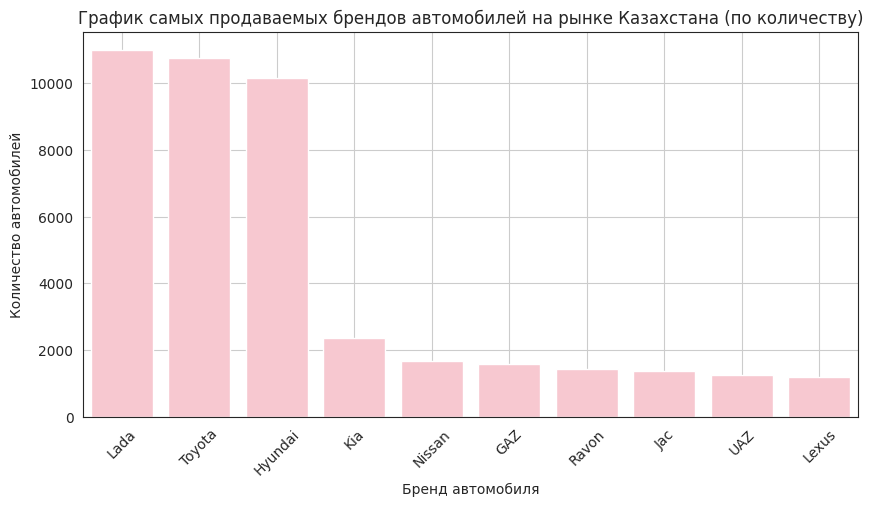

In [92]:
# группируем данные по бренду и количеству проданных авто
df_brand = df.groupby(['brand'],as_index = False)[['quantity']].sum().\
                     sort_values(by='quantity', ascending=False).head(10)
# используем стиль white из библиотеки seaborn
sns.set_style('white')
# назначаем размер графика
plt.figure(figsize=(10, 5))
# строим столбчатый график средствами seaborn
sns.barplot(x='brand', y='quantity', data=df_brand, color='#ffc0cb')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График самых продаваемых брендов автомобилей на рынке Казахстана (по количеству)')
plt.xlabel('Бренд автомобиля')
plt.ylabel('Количество автомобилей')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

Больше всего продается автомобилей марки Lada, Toyota, Hyundai - более 10 тыс.штук. На втором месте по количеству проданных авто - Kia около 2 тыс. штук. Остальные марки продаются в гораздо меньшем объеме, а именно менее 2 тыс. штук.

### 2.1.1. Топ-10 марок авто для розничного потребителя и для некоммерческих целей по количеству авто


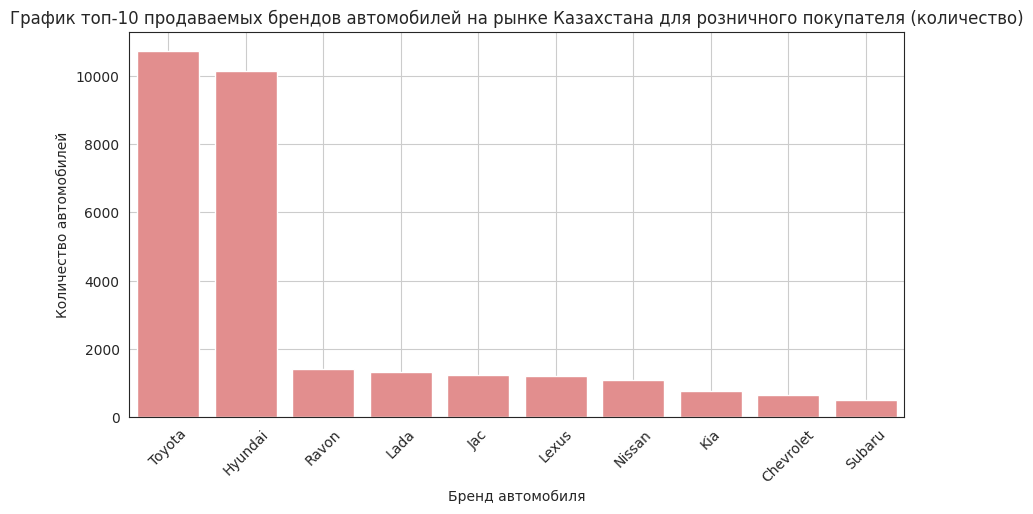

In [93]:
# группируем данные по бренду и количеству проданных авто
df_brand_main = df_main.groupby(['brand'],as_index = False)[['quantity']].sum().\
                     sort_values(by='quantity', ascending=False).head(10)
# используем стиль white из библиотеки seaborn
sns.set_style('white')
# назначаем размер графика
plt.figure(figsize=(10, 5))
# строим столбчатый график средствами seaborn
sns.barplot(x='brand', y='quantity', data=df_brand_main, color='#f08080')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График топ-10 продаваемых брендов автомобилей на рынке Казахстана для розничного покупателя (количество)')
plt.xlabel('Бренд автомобиля')
plt.ylabel('Количество автомобилей')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

На графике видим, что больше всего розничный покупатель приобретает для личных целей авто Toyota и Hyundai (более 1000 шт.). Остальные бренды приобретаются намного меньше от 500 до 1000 шт.

### 2.1.2. Топ-10 марок авто для коммерческих целей и опта по количеству штук



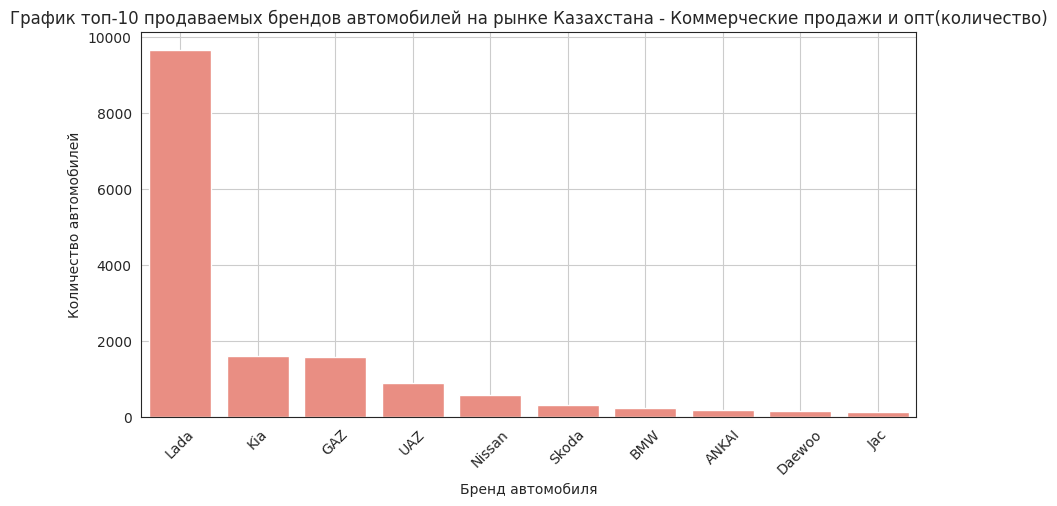

In [94]:
# группируем данные по бренду и количеству проданных авто
df_brand_other = df_other.groupby(['brand'],as_index = False)[['quantity']].sum().\
                     sort_values(by='quantity', ascending=False).head(10)
# используем стиль white из библиотеки seaborn
sns.set_style('white')
# назначаем размер графика
plt.figure(figsize=(10, 5))
# строим столбчатый график средствами seaborn
sns.barplot(x='brand', y='quantity', data=df_brand_other, color='#fa8072')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График топ-10 продаваемых брендов автомобилей на рынке Казахстана - Коммерческие продажи и опт(количество)')
plt.xlabel('Бренд автомобиля')
plt.ylabel('Количество автомобилей')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

Для коммерческих целей и опта больше всего продано авто Lada -почти 10 тыс. штук, на втором месте Kia и GAZ - около 1800 штук. Продажи остальных брендов не превышают 800 штук.

## 2.2. Определим топ-10 брендов авто с самыми высокими продажами

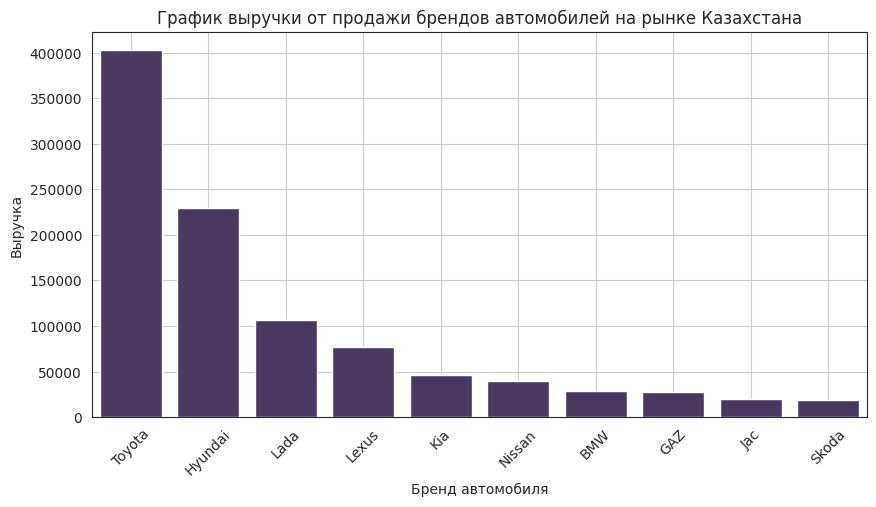

In [95]:
# группируем данные по бренду и количеству проданных авто
df_brand_sale = df.groupby(['brand'],as_index = False)[['sale']].sum().\
                     sort_values(by='sale', ascending=False).head(10)
# используем стиль white из библиотеки seaborn
sns.set_style('white')
# назначаем размер графика
plt.figure(figsize=(10, 5))
# строим столбчатый график средствами seaborn
sns.barplot(x='brand', y='sale', data=df_brand_sale, color='#493267')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График выручки от продажи брендов автомобилей на рынке Казахстана')
plt.xlabel('Бренд автомобиля')
plt.ylabel('Выручка')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

В целом на рынке по выручке от продаж лидирует Toyota - около 400 млн.
На втором месте Hyundai - около 225 млн.
На третьем месте Lada - около 100 млн.
Выручка от продажи остальных брендов менее 100 млн.

### 2.2.1. Топ-10 марок авто для розничного потребителя и для некоммерческих целей по выручке


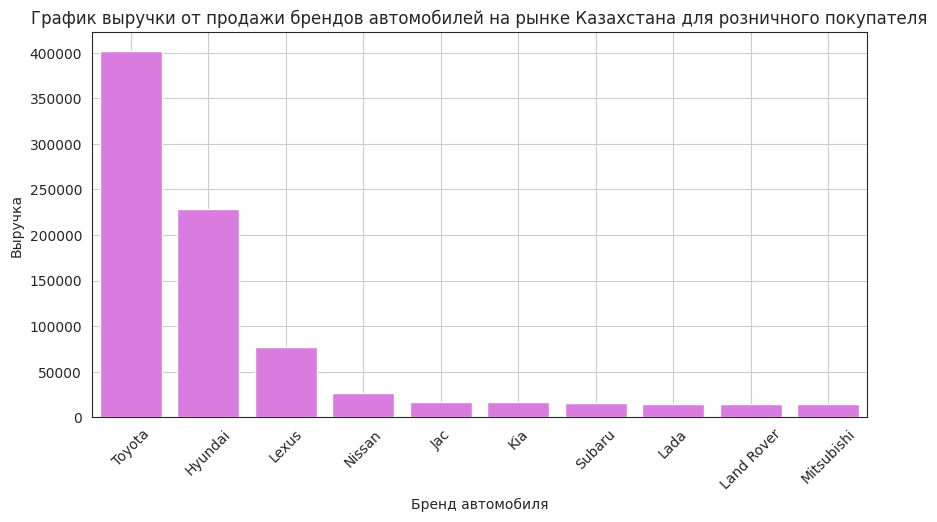

In [96]:
# группируем данные по бренду и количеству проданных авто
df_brand_sale_main = df_main.groupby(['brand'],as_index = False)[['sale']].sum().\
                     sort_values(by='sale', ascending=False).head(10)
# используем стиль white из библиотеки seaborn
sns.set_style('white')
# назначаем размер графика
plt.figure(figsize=(10, 5))
# строим столбчатый график средствами seaborn
sns.barplot(x='brand', y='sale', data=df_brand_sale_main, color='#e86af0')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График выручки от продажи брендов автомобилей на рынке Казахстана для розничного покупателя')
plt.xlabel('Бренд автомобиля')
plt.ylabel('Выручка')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

В рознице по продажам лидирует Toyota - около 400 млн.
На втором месте Hyundai - около 225 млн.
На третьем месте Lexus - около 75 млн. Остальные бренды продаются с выручкой менее 50 млн.

### 2.2.2. Топ-10 марок авто для коммерческих целей и опта по выручке

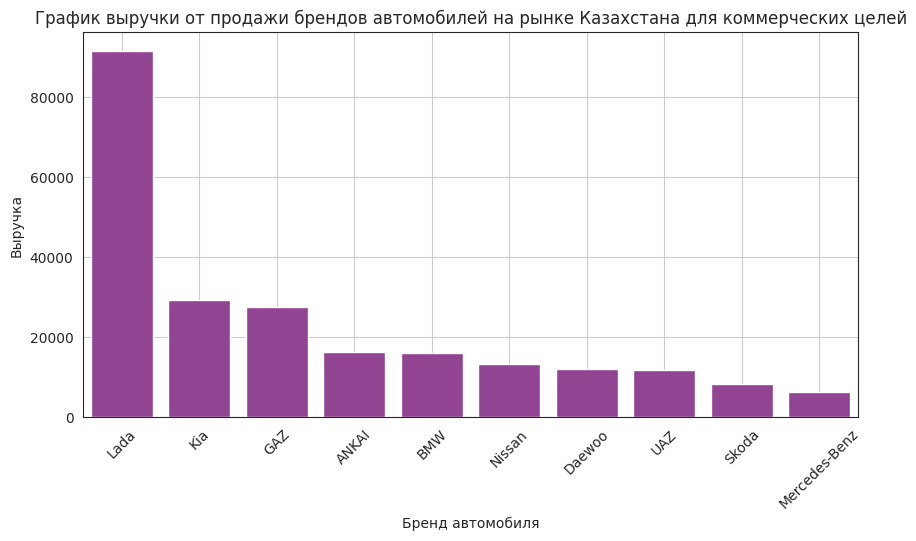

In [97]:
# группируем данные по бренду и количеству проданных авто
df_brand_sale_other = df_other.groupby(['brand'],as_index = False)[['sale']].sum().\
                     sort_values(by='sale', ascending=False).head(10)
# используем стиль white из библиотеки seaborn
sns.set_style('white')
# назначаем размер графика
plt.figure(figsize=(10, 5))
# строим столбчатый график средствами seaborn
sns.barplot(x='brand', y='sale', data=df_brand_sale_other, color='#9e379f')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График выручки от продажи брендов автомобилей на рынке Казахстана для коммерческих целей')
plt.xlabel('Бренд автомобиля')
plt.ylabel('Выручка')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

В оптовой продаже по выручке лидирует Lada  - более 90 млн.
На втором месте Kia и GAZ - около 30 млн. Остальные бренды приносят выручки менее 20 млн.

## 2.3. Определим динамику продаж по количеству проданных авто помесячно

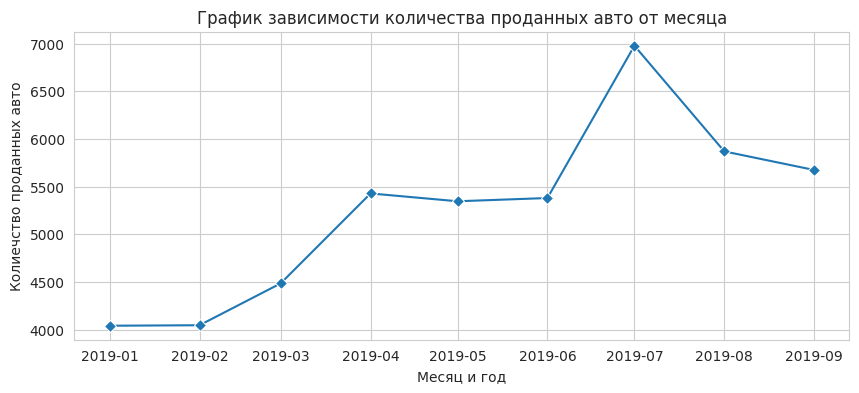

In [98]:
# готовим данные для подсчёта количества проданных авто в зависимости от месяца
df_month = df.groupby('date')[['quantity']].sum()
# применяем стиль whitegrid из библиотеки seaborn
sns.set_style('whitegrid')
# назначаем размер графика
plt.figure(figsize=(10, 4))
# строим линейный график средствами seaborn
sns.lineplot(x='date', y='quantity', data=df_month, marker='D')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График зависимости количества проданных авто от месяца')
plt.xlabel('Месяц и год')
plt.ylabel('Колиечство проданных авто')
# отображаем график на экране
plt.show()

На графике видим, что больше всего авто было продано в июле 2019 года (около 7000 штук). С января 2019 по июль 2019 года видим рост продаж, а после июля 2019 начался спад до 5500 штук.

### 2.3.1. Месячная динамика продаж для розничного покупателя


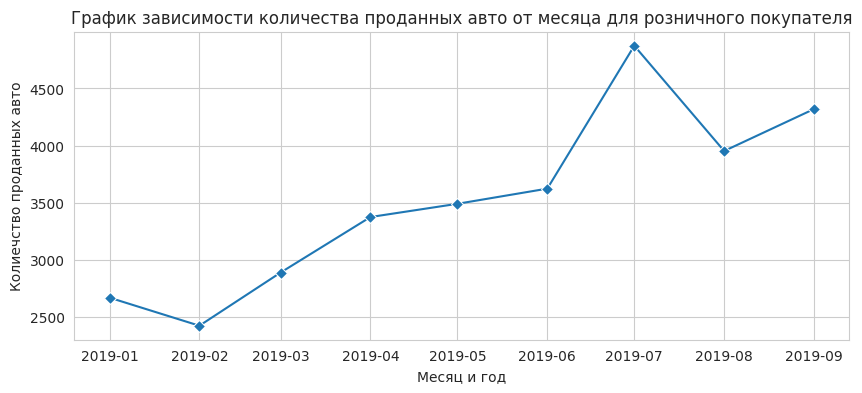

In [99]:
# готовим данные для подсчёта количества проданных авто в зависимости от месяца
df_main_month = df_main.groupby('date')[['quantity']].sum()
# применяем стиль whitegrid из библиотеки seaborn
sns.set_style('whitegrid')
# назначаем размер графика
plt.figure(figsize=(10, 4))
# строим линейный график средствами seaborn
sns.lineplot(x='date', y='quantity', data=df_main_month, marker='D')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График зависимости количества проданных авто от месяца для розничного покупателя')
plt.xlabel('Месяц и год')
plt.ylabel('Колиечство проданных авто')
# отображаем график на экране
plt.show()

График по продажам для розничных покупателей похож на график по общим продажам: пик продаж в июле 2019, также с начала 2019 года видим тенденцию к росту продаж. Однако в феврале заметен сильный спад продаж до минимальных значений (менее 2500 штук). В августе видим спад, однако в сентябре уже наметился рост продаж.

### 2.3.2. Месячная динамика продаж для коммерческих целей


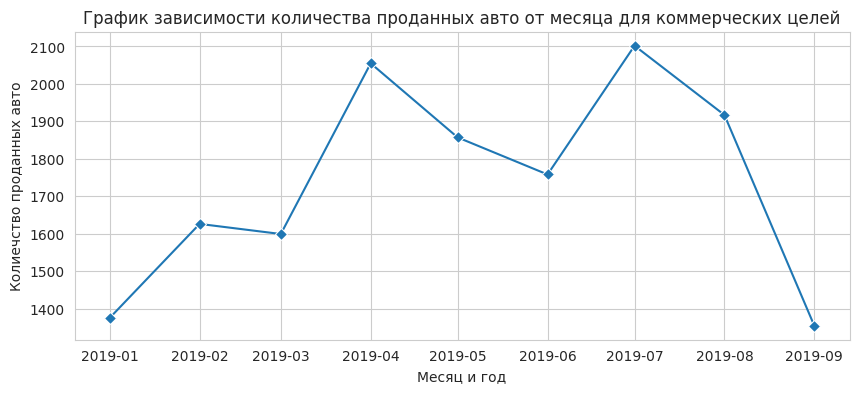

In [100]:
# готовим данные для подсчёта количества проданных авто в зависимости от месяца
df_other_month = df_other.groupby('date')[['quantity']].sum()
# применяем стиль whitegrid из библиотеки seaborn
sns.set_style('whitegrid')
# назначаем размер графика
plt.figure(figsize=(10, 4))
# строим линейный график средствами seaborn
sns.lineplot(x='date', y='quantity', data=df_other_month, marker='D')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График зависимости количества проданных авто от месяца для коммерческих целей')
plt.xlabel('Месяц и год')
plt.ylabel('Колиечство проданных авто')
# отображаем график на экране
plt.show()

На графике зависимости количества проданных авто для коммерческих целей и опта от месяца и года видим другую картину. Рост продаж заметен с января по апрель, затем спад в мае и июне, затем снова рост до уровня апреля и снова спад к сентябрю до январских значений.

## 2.4. Динамика продаж по категориям помесячно: тип топлива, класс и сегмент

#### 2.4.1 Динамика продаж помесячно по типу топлива

In [101]:
# готовим сводную таблицу
df_fuel = df.groupby(['date','fuel_type_category'], as_index=False)[['quantity']].sum()
# строим линейный график
fig = px.line(df_fuel, # загружаем данные
              x='date', # указываем столбец с данными для оси X
              y='quantity', # указываем столбец с данными для оси Y
              color='fuel_type_category', # обозначаем категорию для разделения цветом
              markers=True) # отображаем маркеры (точки) на графике
# оформляем график
fig.update_layout(title='Зависимость количества продаж по типу топлива от месяца',
                   xaxis_title='Месяц',
                   yaxis_title='Количество продаж')
fig.show() # выводим график

Больше всего продается авто на бензине, на втором месте - дизель, резкий рос продаж в июле 2019. Электрокары продавались по 1 штуке с февраля по июнь, далее продаж этого вида машин не было. Пик продаж гибридов пришелся на август 2019 (4 штуки).

#### 2.4.2 Динамика продаж помесячно по классу

In [102]:
# готовим сводную таблицу
df_class = df.groupby(['date','class_2013'], as_index=False)[['quantity']].sum()
# строим линейный график
fig = px.line(df_class, # загружаем данные
              x='date', # указываем столбец с данными для оси X
              y='quantity', # указываем столбец с данными для оси Y
              color='class_2013', # обозначаем категорию для разделения цветом
              markers=True) # отображаем маркеры (точки) на графике
# оформляем график
fig.update_layout(title='Зависимость количества продаж по классу 2013 от месяца',
                   xaxis_title='Месяц',
                   yaxis_title='Количество продаж')
fig.show() # выводим график

На графике видим, что больше всего продается авто класса B. Компактные SUV стабильно растут по количеству продаж в диапазоне от 650 до 900 штук, спрос стабилен. Субкомпактные SUV растут неравномерно, пик наблюдается в июле 2019. Авто d класса также растут равномерно с 400 до 650 штук. т.е. на данную модель спрос стабилен.

#### 2.4.3 Динамика продаж помесячно по сегменту

In [103]:
# готовим сводную таблицу
df_seg = df.groupby(['date','segmentation_2013'], as_index=False)[['quantity']].sum()
# строим линейный график
fig = px.line(df_seg, # загружаем данные
              x='date', # указываем столбец с данными для оси X
              y='quantity', # указываем столбец с данными для оси Y
              color='segmentation_2013', # обозначаем категорию для разделения цветом
              markers=True) # отображаем маркеры (точки) на графике
# оформляем график
fig.update_layout(title='Зависимость количества продаж по сегменту 2013 от месяца',
                   xaxis_title='Месяц',
                   yaxis_title='Количество продаж')
fig.show() # выводим график

Больше всего продается легковых авто и внедорожников. Их рост скачкообразный, но стабильный. Коммерческие автомобили, минивэны и пикапы намного уступают по количеству проданных авто, однако спрос на них стабилен и держится примерно на одном уровне.


## 2.5. Проджаи по регионам

In [104]:
#создадим датафрем с количеством проданных авто по регионам, выделим топ-10 регионов
df_region = data.groupby('region').agg({'region': pd.Series.mode,
                                    'quantity':'sum'}).\
                  sort_values(by='quantity', ascending=False).\
                  reset_index(drop=True).head(10)
df_region

region  quantity
0            алматы   13942.0
1        нур-султан   10147.0
2           шымкент    3746.0
3            атырау    3390.0
4          костанай    3257.0
5         караганда    2973.0
6           уральск    2177.0
7  усть-каменогорск    2094.0
8             актау    2049.0
9           экспорт    1919.0

In [105]:
# строим столбчатую диаграмму
fig = px.bar(df_region.sort_values(by='quantity', ascending=True), # загружаем данные и заново их сортируем
             x='quantity', # указываем столбец с данными для оси X
             y='region', # указываем столбец с данными для оси Y
             text='quantity', # добавляем аргумент, который отобразит текст с информацией
             color_discrete_sequence=["#20b2aa"])

# оформляем график
fig.update_layout(title='Количество проданных автомобилей в регионах - топ-10',
                   xaxis_title='Количество авто',
                   yaxis_title='Регион')
fig.show() # выводим график

Больше всего авто продается в Алматы около 14 тыс. штук. Затем в Нур-Султан - около 10 тыс. штук. Около 3х тыс. штук продается в Шымкент, Атырау, Костанай и Караганда. В остальных регионах продажи около 2х. тыс. штук.

## 2.6. Продажи по автоцентрам. Определить самый продаваемый автомобиль, бренд, марку.

In [106]:
#создадим датафрем с количеством проданных авто по автоцентрам
df_company = df.groupby('company').agg({'company': pd.Series.mode,
                                    'quantity':'sum'}).\
                  sort_values(by='quantity', ascending=False).\
                  reset_index(drop=True)
df_company.head(15)

company  quantity
0                 бипэк авто   14821.0
1    toyota motor kazakhstan   11947.0
2              astana motors   10158.0
3                      вираж    2674.0
4   nissan manufacturing rus    1760.0
5                 allur auto    1751.0
6     ravon motors kazakstan    1288.0
7          subaru kazakhstan     503.0
8          автоцентр-бавария     454.0
9                    mmc rus     447.0
10               mercur auto     270.0
11          лифан моторс рус     233.0
12               autokapital     179.0
13     daewoo bus kazakhstan     146.0
14     eurasia motor premium     102.0

In [107]:
# строим столбчатую диаграмму
fig = px.bar(df_company.sort_values(by='quantity', ascending=True), # загружаем данные и заново их сортируем
             x='quantity', # указываем столбец с данными для оси X
             y='company', # указываем столбец с данными для оси Y
             text='quantity', # добавляем аргумент, который отобразит текст с информацией
             color_discrete_sequence=["#20b2aa"])

# оформляем график
fig.update_layout(title='Количество проданных автомобилей в автоцентрах',
                   xaxis_title='Количество авто',
                   yaxis_title='Автоцентр')
fig.show() # выводим график

Больше всего автомобилей продано в Бипэк авто более 15 тыс. штук
Toyota motor kazakhstan	и Astana Motors продали более 10 тыс. штук.
Mercur Auto лишь на 11 позиции - 270 штук.

In [108]:
top3_auto = df.groupby('brand').agg({'brand': pd.Series.mode,
                                       'quantity':'sum',
                                       'sale':'sum'}).\
                  sort_values(by='quantity', ascending=False).\
                  reset_index(drop=True).head(10)
top3_auto

brand  quantity       sale
0     Lada   10974.0  106771.95
1   Toyota   10741.0  402358.47
2  Hyundai   10157.0  228949.51
3      Kia    2358.0   45669.70
4   Nissan    1664.0   40012.55
5      GAZ    1586.0   27686.24
6    Ravon    1424.0   13917.02
7      Jac    1367.0   19613.79
8      UAZ    1269.0   17643.11
9    Lexus    1206.0   77375.95

По количеству больше всего продали Lada, а по выручке лидирует Toyota.

In [109]:
top3_model = df.groupby('model').agg({'model': pd.Series.mode,
                                      'brand': pd.Series.mode,
                                      'quantity':'sum',
                                      'sale':'sum'}).\
                  sort_values(by='quantity', ascending=False).\
                  reset_index(drop=True).head(10)
top3_model

model    brand  quantity       sale
0     Camry   Toyota    4853.0  155751.02
1    Granta     Lada    3664.0   26671.89
2    Tucson  Hyundai    3260.0   86958.38
3     Vesta     Lada    2653.0   31116.26
4       4x4     Lada    2354.0   21303.60
5    Accent  Hyundai    2211.0   36482.71
6   Elantra  Hyundai    2062.0   41268.03
7     Creta  Hyundai    1775.0   35222.40
8  LC Prado   Toyota    1711.0   83134.52
9    Largus     Lada    1683.0   19173.20

По продажам Toyota безоговорочный лидер модель Camry - 4853 шт. выручка 155648 тыс. На втором месте Lada Granta 3664 шт. выручка 26656 тыс.
На третьем месте Hyundai Tucson 3260 шт. выручка 87002 тыс.
Таким образом самым продаваемым автомобилем является Toyota Camry.

## 2.7. Показатели эффективности меркур авто

In [110]:
#создадим отдельный датафрем с данными mercur auto
df_ma = df.query('company == "mercur auto"')

In [111]:
df_ma_model = df_ma.groupby('model').agg({'model': pd.Series.mode,
                                        'brand': pd.Series.mode,
                                       'quantity':'sum',
                                       'sale':'sum'}).\
                  sort_values(by='sale', ascending=False).\
                  reset_index(drop=True).head(10)
df_ma_model

model       brand  quantity     sale
0   Cayenne     Porsche      28.0  2856.27
1        Q8        Audi      20.0  1793.13
2      Polo  Volkswagen     106.0  1569.91
3    Tiguan  Volkswagen      39.0  1245.45
4  Panamera     Porsche       8.0  1079.06
5     Macan     Porsche      15.0  1015.63
6        A6        Audi       8.0   607.69
7        A8        Audi       5.0   557.80
8        Q5        Audi       8.0   433.24
9        Q7        Audi       3.0   233.08

Больше всего в Mercur Auto продается Volkswagen Polo - 106 шт. Однако большую выручку приносит продажа Porsche	Cayenne - 2856 тыс.

In [112]:
print('Выручка Mercur Auto составила', round(df_ma['sale'].sum(),2), 'тыс. долларов')
print('Количество проданных авто Mercur Auto составило', df_ma['quantity'].sum(), 'шт')
print('Выручка всех автоцентров составила', df['sale'].sum(), 'тыс. долларов')
print('Количество проданных авто всех автоцентров составило', df['quantity'].sum(), 'шт')
print('Доля выручка Mercur Auto составила', round(df_ma['sale'].sum()/df['sale'].sum()*100,2), '%')
print('Доля продаж авто Mercur Auto составила', round(df_ma['quantity'].sum()/df['quantity'].sum()*100,2), '%')

Выручка Mercur Auto составила 12839.84 тыс. долларов
Количество проданных авто Mercur Auto составило 270.0 шт
Выручка всех автоцентров составила 1175146.37 тыс. долларов
Количество проданных авто всех автоцентров составило 47246.0 шт
Доля выручка Mercur Auto составила 1.09 %
Доля продаж авто Mercur Auto составила 0.57 %


Mercur Auto не является крупным игроком на рынке Казахстана. Его доля в общем объеме продаж составила лишь 1%, а по количеству авто - 0.6%.


In [113]:
# готовим сводную таблицу
df_ma_brand = df_ma.groupby(['date','brand'], as_index=False)[['quantity']].sum()
# строим линейный график
fig = px.line(df_ma_brand, # загружаем данные
              x='date', # указываем столбец с данными для оси X
              y='quantity', # указываем столбец с данными для оси Y
              color='brand', # обозначаем категорию для разделения цветом
              markers=True) # отображаем маркеры (точки) на графике
# оформляем график
fig.update_layout(title='Зависимость количества продаж по бренду от месяца для Mercur Auto',
                   xaxis_title='Месяц',
                   yaxis_title='Количество продаж')
fig.show() # выводим график

На графике видим, что Mercur Auto продает в основном такие бренды как Porshe и Audi. Продажи стабильны с небольшим ростом по количеству проданных авто. Пик продаж в мае и июле 2019. С июня по май активно продавались авто бренда Volkswagen. пик продаж пришелся на февраль 2019 года, однако затем пошел резкий спад и авто перестали продавать с июня 2019 года.


# Вывод и рекомендации

1. По количеству проданных авто в Казахстане лидируют такие бренды как Lada, Toyota, Hyundai и Kia. Для розничных покупателей, использующих авто для личных целей, лидирует Toyota и Hyundai. Для коммерческих целей и оптом закупают в основном Lada, Kia и GAZ. <br>
2. По полученной выручке лидирует Toyota, Hyundai и Lada. Для розничных покупателей - это Toyota, Hyundai и Lexus. Для коммерческих целей и опта - Lada, Kia и GAZ. Т.е Для розничных покупателей лидирует и по количеству и по выручке Toyota. Для коммерческих целей и опта - лидирует Lada.<br>
3. По общему количеству продаж видим рост с января по июль 2019, в июле 2019 - пик продаж, затем спад. Для розничных покупателей картина такая же, а вот для коммерческих целей и опта видим рост с января по апрель и с июня по июль 2019. И снова спад в сментябре 2019. <br>
4. Чаще всего продаются авто на бензине, реже на дизиле. Не популярны гибридные авто и электрокары.<br>
5. Популярнее всего легковые авто и внедорожники. <br>
6. Авто Класса В продается больше всего, однако продажи в течение периода растут неравномерно. Компактных SUV и авто класса D продается немного меньше, однако продажи этих авто стабильны и не имеют сильных колебаний по количеству проданных авто.<br>
7. Лидеры по продажам авто - город Алматы и Нур-Султан.<br>
8. Компанией лидером является Бипэк авто, затем идут Toyota motor kazakhstan и Astana Motors. Mercur Auto лишь на 11 позиции.<br>
9. Безоговорочный лидер по продажам в Казахстане - модель Toyota Camry. Далее по популярности идут Lada Granta и Hyundai Tucson. <br>
10. Mercur Auto продает в основном такие бренды как Porshe и Audi. Продажи стабильны с небольшим ростом по количеству проданных авто. Пик продаж в мае и июле 2019. С июня по май активно продавались авто бренда Volkswagen. пик продаж пришелся на февраль 2019 года, однако затем пошел резкий спад и авто перестали продавать с июня 2019 года. Mercur Auto не является лидером рынка, однако продажи Porshe и Audi у компани стабильны. <br>





**Рекомендации:**
Рекомендую обратить внимание на падение продаж в сентябре 2019 года. Поскольку самой популярной авто в Казахстане является Toyota Camry, возможно имеет смысл обратить Mercur Auto внимание на эту модель и продавать ее, чтобы увеличь выручку компании. Также не стоит делать ставку на гибридные авто и электро кары. Покупаются они неохотно. Рекомендую отдавать предпочтение авто на бензине или дизеле. Также стоит обратить внимание на расширение продаж в регионах.